In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances
from sklearn.linear_model import LinearRegression
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('telcom_data (2).xlsx - Sheet1 (1).csv')
print(df.head())

      Bearer Id          Start  Start ms            End  End ms  Dur. (ms)  \
0  1.311450e+19   4/4/19 12:01     770.0  4/25/19 14:35   662.0  1823652.0   
1  1.311450e+19   4/9/19 13:04     235.0   4/25/19 8:15   606.0  1365104.0   
2  1.311450e+19   4/9/19 17:42       1.0  4/25/19 11:58   652.0  1361762.0   
3  1.311450e+19   4/10/19 0:31     486.0   4/25/19 7:36   171.0  1321509.0   
4  1.311450e+19  4/12/19 20:10     565.0  4/25/19 10:40   954.0  1089009.0   

           IMSI  MSISDN/Number          IMEI Last Location Name  ...  \
0  2.082014e+14   3.366496e+10  3.552121e+13        9.16457E+15  ...   
1  2.082019e+14   3.368185e+10  3.579401e+13            L77566A  ...   
2  2.082003e+14   3.376063e+10  3.528151e+13            D42335A  ...   
3  2.082014e+14   3.375034e+10  3.535661e+13            T21824A  ...   
4  2.082014e+14   3.369980e+10  3.540701e+13            D88865A  ...   

   Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0          15854611.0           2

In [4]:
print(df.isnull().sum())

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [5]:
user_engagement = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Sessions Frequency
    'Dur. (ms)': 'sum',   # Total Duration
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()

In [7]:
user_engagement['Total Traffic (Bytes)'] = user_engagement['Total UL (Bytes)'] + user_engagement['Total DL (Bytes)']
user_engagement.columns = ['MSISDN/Number', 'Session Count', 'Total Duration (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Traffic (Bytes)']
print(user_engagement.head())

   MSISDN/Number  Session Count  Total Duration (ms)  Total UL (Bytes)  \
0   3.360100e+10              1             116720.0        36053108.0   
1   3.360100e+10              1             181230.0        36104459.0   
2   3.360100e+10              1             134969.0        39306820.0   
3   3.360101e+10              1              49878.0        20327526.0   
4   3.360101e+10              2              37104.0        94280527.0   

   Total DL (Bytes)  Total Traffic (Bytes)  
0      8.426375e+08           8.786906e+08  
1      1.207552e+08           1.568596e+08  
2      5.566597e+08           5.959665e+08  
3      4.019932e+08           4.223207e+08  
4      1.363130e+09           1.457411e+09  


In [8]:
user_engagement = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Sessions Frequency
    'Dur. (ms)': 'sum',   # Total Duration
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()
user_engagement.columns = ['MSISDN/Number', 'Session Count', 'Total Duration (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']
user_engagement['Total Traffic (Bytes)'] = user_engagement['Total UL (Bytes)'] + user_engagement['Total DL (Bytes)']
print(user_engagement.head())

   MSISDN/Number  Session Count  Total Duration (ms)  Total UL (Bytes)  \
0   3.360100e+10              1             116720.0        36053108.0   
1   3.360100e+10              1             181230.0        36104459.0   
2   3.360100e+10              1             134969.0        39306820.0   
3   3.360101e+10              1              49878.0        20327526.0   
4   3.360101e+10              2              37104.0        94280527.0   

   Total DL (Bytes)  Total Traffic (Bytes)  
0      8.426375e+08           8.786906e+08  
1      1.207552e+08           1.568596e+08  
2      5.566597e+08           5.959665e+08  
3      4.019932e+08           4.223207e+08  
4      1.363130e+09           1.457411e+09  


In [9]:
## Top 10 customers per engagement metric
metrics = ['Session Count', 'Total Duration (ms)', 'Total Traffic (Bytes)']
for metric in metrics:
    top_10 = user_engagement.nlargest(10, metric)
    print(f"Top 10 by {metric}:")
    print(top_10[['MSISDN/Number', metric]])

Top 10 by Session Count:
       MSISDN/Number  Session Count
13526   3.362632e+10             18
6437    3.361489e+10             17
13180   3.362578e+10             17
37052   3.365973e+10             16
76363   3.367588e+10             15
92923   3.376054e+10             15
65118   3.366716e+10             13
666     3.360313e+10             12
1279    3.360452e+10             12
13994   3.362708e+10             12
Top 10 by Total Duration (ms):
       MSISDN/Number  Total Duration (ms)
13180   3.362578e+10           18553754.0
6437    3.361489e+10            9966898.0
92923   3.376054e+10            9279434.0
13526   3.362632e+10            8791927.0
65118   3.366716e+10            8744914.0
50281   3.366284e+10            6614270.0
57160   3.366469e+10            6288730.0
666     3.360313e+10            6287761.0
66029   3.366746e+10            5649882.0
92577   3.376041e+10            5321667.0
Top 10 by Total Traffic (Bytes):
       MSISDN/Number  Total Traffic (Bytes)
6437    3

In [10]:
scaler = MinMaxScaler()
engagement_metrics = user_engagement[['Session Count', 'Total Duration (ms)', 'Total Traffic (Bytes)']]
normalized_metrics = scaler.fit_transform(engagement_metrics)
kmeans = KMeans(n_clusters=3, random_state=42)
user_engagement['Cluster'] = kmeans.fit_predict(normalized_metrics)

In [11]:
for cluster in range(3):
    cluster_data = user_engagement[user_engagement['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Min Session Count: {cluster_data['Session Count'].min()}, Max: {cluster_data['Session Count'].max()}, Avg: {cluster_data['Session Count'].mean()}, Total: {cluster_data['Session Count'].sum()}")
    print(f"Min Duration: {cluster_data['Total Duration (ms)'].min()}, Max: {cluster_data['Total Duration (ms)'].max()}, Avg: {cluster_data['Total Duration (ms)'].mean()}, Total: {cluster_data['Total Duration (ms)'].sum()}")
    print(f"Min Traffic: {cluster_data['Total Traffic (Bytes)'].min()}, Max: {cluster_data['Total Traffic (Bytes)'].max()}, Avg: {cluster_data['Total Traffic (Bytes)'].mean()}, Total: {cluster_data['Total Traffic (Bytes)'].sum()}")


Cluster 0:
Min Session Count: 1, Max: 4, Avg: 2.184791341745829, Total: 46228
Min Duration: 18235.0, Max: 3174824.0, Avg: 215100.80622902783, Total: 4551317959.0
Min Traffic: 284218230.0, Max: 1915932799.0, Avg: 1138979098.6563165, Total: 24099658748469.0

Cluster 1:
Min Session Count: 3, Max: 18, Avg: 4.258193645233925, Total: 17020
Min Duration: 49323.0, Max: 18553754.0, Avg: 572159.112084063, Total: 2286919971.0
Min Traffic: 1085993876.0, Max: 8846226494.0, Avg: 2294204082.622467, Total: 9169933718242.0

Cluster 2:
Min Session Count: 0, Max: 2, Avg: 1.043549571603427, Total: 85258
Min Duration: 7142.0, Max: 1573420.0, Avg: 107473.68085679314, Total: 8780599726.0
Min Traffic: 33249009.0, Max: 1427100348.0, Avg: 496497601.5219339, Total: 40563854044342.0


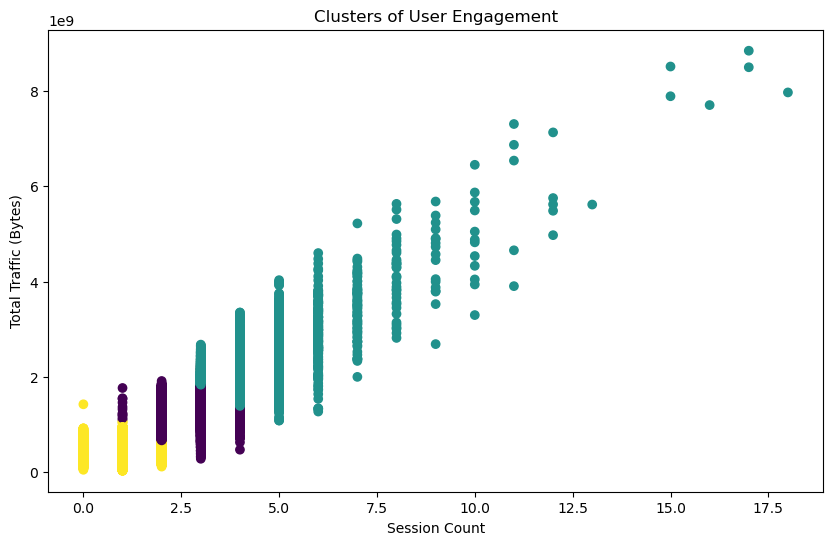

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(user_engagement['Session Count'], user_engagement['Total Traffic (Bytes)'], c=user_engagement['Cluster'])
plt.xlabel('Session Count')
plt.ylabel('Total Traffic (Bytes)')
plt.title('Clusters of User Engagement')
plt.show()

In [13]:
applications = ['Youtube', 'Netflix', 'Gaming', 'Other']
for app in applications:
    user_engagement[f'{app} Total (Bytes)'] = df.groupby('MSISDN/Number')[f'{app} DL (Bytes)'].sum() + df.groupby('MSISDN/Number')[f'{app} UL (Bytes)'].sum()
    top_10_users = user_engagement.nlargest(10, f'{app} Total (Bytes)')
    print(f"\nTop 10 engaged users for {app}:")
    print(top_10_users[['MSISDN/Number', f'{app} Total (Bytes)']])


Top 10 engaged users for Youtube:
   MSISDN/Number  Youtube Total (Bytes)
0   3.360100e+10                    NaN
1   3.360100e+10                    NaN
2   3.360100e+10                    NaN
3   3.360101e+10                    NaN
4   3.360101e+10                    NaN
5   3.360101e+10                    NaN
6   3.360101e+10                    NaN
7   3.360101e+10                    NaN
8   3.360101e+10                    NaN
9   3.360102e+10                    NaN

Top 10 engaged users for Netflix:
   MSISDN/Number  Netflix Total (Bytes)
0   3.360100e+10                    NaN
1   3.360100e+10                    NaN
2   3.360100e+10                    NaN
3   3.360101e+10                    NaN
4   3.360101e+10                    NaN
5   3.360101e+10                    NaN
6   3.360101e+10                    NaN
7   3.360101e+10                    NaN
8   3.360101e+10                    NaN
9   3.360102e+10                    NaN

Top 10 engaged users for Gaming:
   MSISDN/Number

In [14]:
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


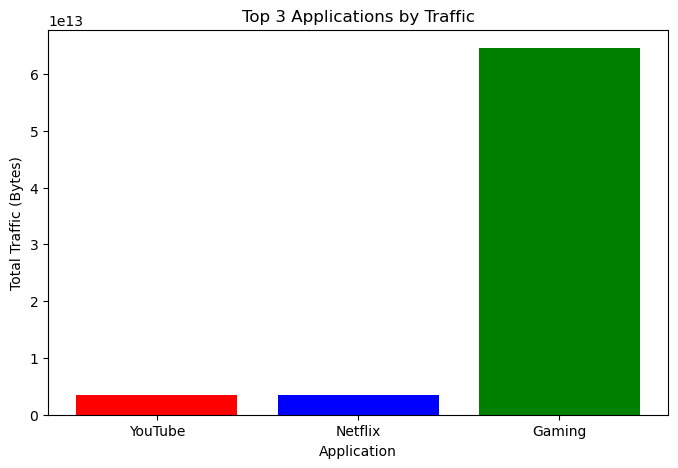

In [15]:
# Example if columns exist in df like 'Youtube DL (Bytes)'
youtube_dl = df['Youtube DL (Bytes)'].sum()
youtube_ul = df['Youtube UL (Bytes)'].sum()
youtube_total = youtube_dl + youtube_ul

netflix_dl = df['Netflix DL (Bytes)'].sum()
netflix_ul = df['Netflix UL (Bytes)'].sum()
netflix_total = netflix_dl + netflix_ul

gaming_dl = df['Gaming DL (Bytes)'].sum()
gaming_ul = df['Gaming UL (Bytes)'].sum()
gaming_total = gaming_dl + gaming_ul

app_traffic = [youtube_total, netflix_total, gaming_total]
apps = ['YouTube', 'Netflix', 'Gaming']

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(apps, app_traffic, color=['red','blue','green'])
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.title('Top 3 Applications by Traffic')
plt.show()

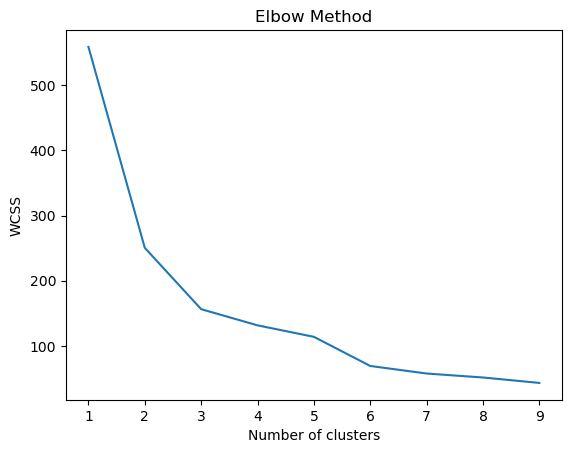

In [16]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [17]:
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [18]:
df.columns = df.columns.str.strip()

In [19]:
print(df['Avg RTT DL (ms)'].describe())

count    122172.000000
mean        109.795706
std         619.782739
min           0.000000
25%          32.000000
50%          45.000000
75%          70.000000
max       96923.000000
Name: Avg RTT DL (ms), dtype: float64


In [20]:
print(df['DL TP < 50 Kbps (%)'].describe())  

count    149247.000000
mean         92.844754
std          13.038031
min           0.000000
25%          91.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: DL TP < 50 Kbps (%), dtype: float64


In [21]:
print(df['Avg RTT DL (ms)'].describe())
print(df['DL TP < 50 Kbps (%)'].describe())

count    122172.000000
mean        109.795706
std         619.782739
min           0.000000
25%          32.000000
50%          45.000000
75%          70.000000
max       96923.000000
Name: Avg RTT DL (ms), dtype: float64
count    149247.000000
mean         92.844754
std          13.038031
min           0.000000
25%          91.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: DL TP < 50 Kbps (%), dtype: float64


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

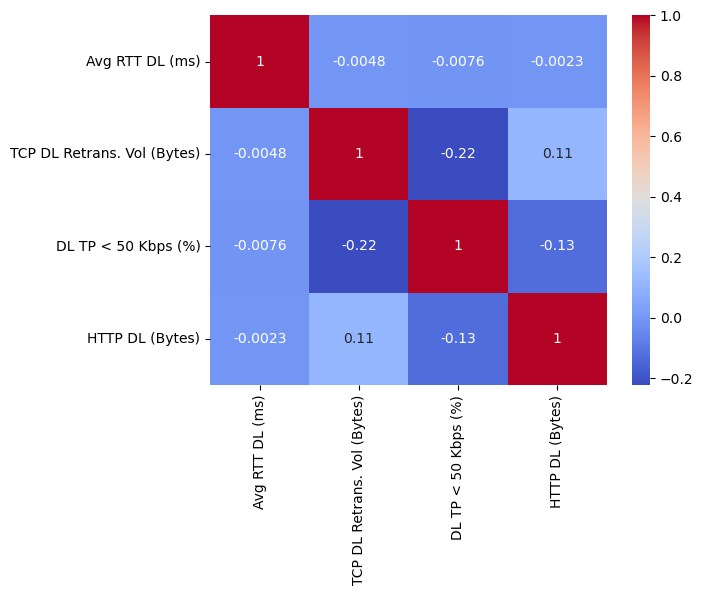

In [23]:
corr_matrix = df[['Avg RTT DL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', 'HTTP DL (Bytes)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Handset Manufacturer
Apple                               59565
Samsung                             40839
Huawei                              34423
undefined                            8987
Sony Mobile Communications Ab         980
                                    ...  
Pt. Arga Mas Lestari                    1
Doke Communication (Hk) Limited         1
Vastking Technology (Hk) Limited        1
Mobiwire Sas                            1
Shenzhen Gaoxinqi                       1
Name: count, Length: 170, dtype: int64


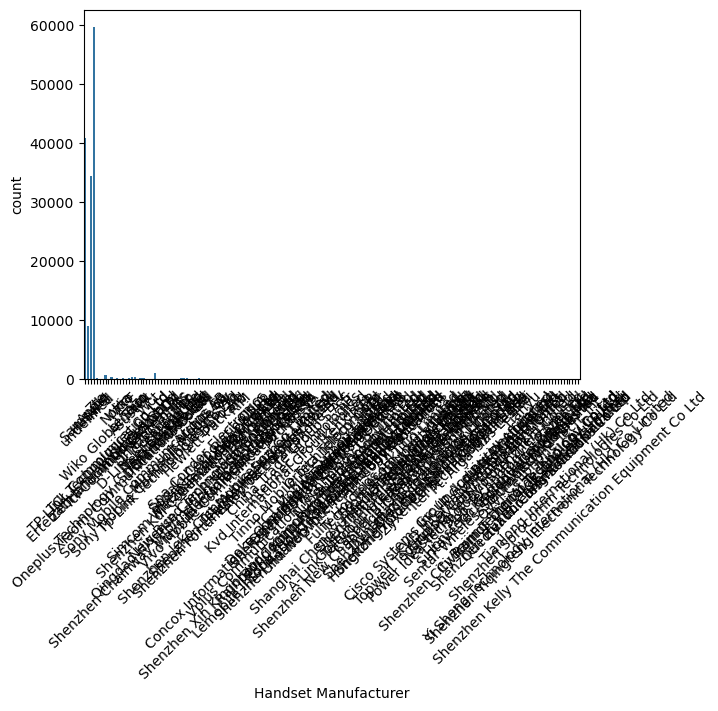

In [24]:
handset_counts = df['Handset Manufacturer'].value_counts()
print(handset_counts)
sns.countplot(x='Handset Manufacturer', data=df)
plt.xticks(rotation=45)
plt.show()

In [26]:
from sklearn.cluster import KMeans

In [27]:
experience_metrics = df[['Avg RTT DL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)']]

In [28]:
experience_metrics = experience_metrics.dropna()

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df.loc[experience_metrics.index, 'Experience Cluster'] = kmeans.fit_predict(experience_metrics)

In [30]:
from sklearn.impute import SimpleImputer

experience_metrics = df[['Avg RTT DL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)']]

In [31]:
imputer = SimpleImputer(strategy='mean')
experience_metrics_imputed = imputer.fit_transform(experience_metrics)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Experience Cluster'] = kmeans.fit_predict(experience_metrics_imputed)

In [32]:
print(experience_metrics.isna().sum())

Avg RTT DL (ms)                27829
TCP DL Retrans. Vol (Bytes)    88146
DL TP < 50 Kbps (%)              754
dtype: int64


In [33]:
import pandas as pd
import numpy as np

In [34]:
print(df.columns) 

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [35]:
if 'tcp_dl_retrans_bytes' in df.columns:
    df['tcp_dl_retrans_bytes'] = df['tcp_dl_retrans_bytes'].fillna(df['tcp_dl_retrans_bytes'].mean())
if 'avg_rtt_dl_ms' in df.columns:
    df['avg_rtt_dl_ms'] = df['avg_rtt_dl_ms'].fillna(df['avg_rtt_dl_ms'].mean())
if 'throughput_kbps' in df.columns:
    df['throughput_kbps'] = df['throughput_kbps'].fillna(df['throughput_kbps'].mean())
if 'Manufacturer' in df.columns:
    df['Manufacturer'] = df['Manufacturer'].fillna(df['Manufacturer'].mode()[0])


In [36]:
df['TCP DL Retrans. Vol (Bytes)'] = df['TCP DL Retrans. Vol (Bytes)'].fillna(df['TCP DL Retrans. Vol (Bytes)'].mean())
df['Avg RTT DL (ms)'] = df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())
df['DL TP < 50 Kbps (%)'] = df['DL TP < 50 Kbps (%)'].fillna(df['DL TP < 50 Kbps (%)'].mean())
df['Handset Manufacturer'] = df['Handset Manufacturer'].fillna(df['Handset Manufacturer'].mode()[0])

In [37]:
customer_experience = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',  # Adjust column name
    'Avg RTT DL (ms)': 'mean',
    'Handset Manufacturer': lambda x: x.mode().iloc[0],  # Handling mode
    'DL TP < 50 Kbps (%)': 'mean'
}).reset_index()


In [38]:
customer_experience['Handset Manufacturer'] = customer_experience['Handset Manufacturer'].apply(lambda x: x.iloc[0] if isinstance(x, pd.Series) else x)

In [39]:
# a. TCP values
print("Top 10 TCP:", customer_experience['TCP DL Retrans. Vol (Bytes)'].nlargest(10))
print("Bottom 10 TCP:", customer_experience['TCP DL Retrans. Vol (Bytes)'].nsmallest(10))
print("Most frequent TCP:", customer_experience['TCP DL Retrans. Vol (Bytes)'].value_counts().head(10))

Top 10 TCP: 85785    4.289488e+09
32273    4.288060e+09
58026    4.268432e+09
31942    4.254644e+09
62049    4.211189e+09
70079    4.166591e+09
43629    4.131046e+09
48341    4.117753e+09
64113    3.968072e+09
98211    3.785295e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Bottom 10 TCP: 56622     2.0
95322     2.0
71705     4.0
71778     4.0
87156     4.0
87348     4.0
95213     4.0
95331     4.0
95774     4.0
100616    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Most frequent TCP: TCP DL Retrans. Vol (Bytes)
2.080991e+07    58332
1.330000e+03      247
2.660000e+03      138
9.200000e+01      112
1.040562e+07      103
3.800000e+01       99
1.318000e+03       79
3.990000e+03       72
1.040498e+07       68
5.320000e+03       64
Name: count, dtype: int64


In [81]:
# b. RTT values
print("Top 10 RTT:", customer_experience['Avg RTT DL (ms)'].nlargest(10))
print("Bottom 10 RTT:", customer_experience['Avg RTT DL (ms)'].nsmallest(10))
print("Most frequent RTT:", customer_experience['Avg RTT DL (ms)'].value_counts().head(10))

Top 10 RTT: 47983     96923.0
80249     54847.0
41944     32333.0
93844     26971.0
1713      26250.0
74240     25602.0
104325    25374.0
105752    24733.0
85683     22961.5
15409     20979.0
Name: Avg RTT DL (ms), dtype: float64
Bottom 10 RTT: 28878     0.0
40873     0.0
44748     0.0
66098     0.0
88903     0.0
98541     0.0
39066     2.0
83396     4.0
36039     5.0
106569    5.0
Name: Avg RTT DL (ms), dtype: float64
Most frequent RTT: Avg RTT DL (ms)
109.795706    18536
28.000000      2282
27.000000      2013
34.000000      1832
35.000000      1652
37.000000      1640
38.000000      1618
29.000000      1546
36.000000      1541
26.000000      1495
Name: count, dtype: int64


In [40]:
# c. Throughput values
print("Top 10 Throughput:", customer_experience['DL TP < 50 Kbps (%)'].nlargest(10))
print("Bottom 10 Throughput:", customer_experience['DL TP < 50 Kbps (%)'].nsmallest(10))
print("Most frequent Throughput:", customer_experience['DL TP < 50 Kbps (%)'].value_counts().head(10))


Top 10 Throughput: 0     100.0
1     100.0
2     100.0
3     100.0
8     100.0
9     100.0
10    100.0
12    100.0
13    100.0
14    100.0
Name: DL TP < 50 Kbps (%), dtype: float64
Bottom 10 Throughput: 92980    0.0
98211    0.0
57799    2.0
35801    3.0
54101    3.0
54658    4.0
77593    5.0
14982    6.0
86880    6.0
29731    8.0
Name: DL TP < 50 Kbps (%), dtype: float64
Most frequent Throughput: DL TP < 50 Kbps (%)
100.0    57921
99.0      4051
98.0      2447
97.0      2073
96.0      1774
95.0      1503
94.0      1416
93.0      1406
92.0      1293
91.0      1237
Name: count, dtype: int64


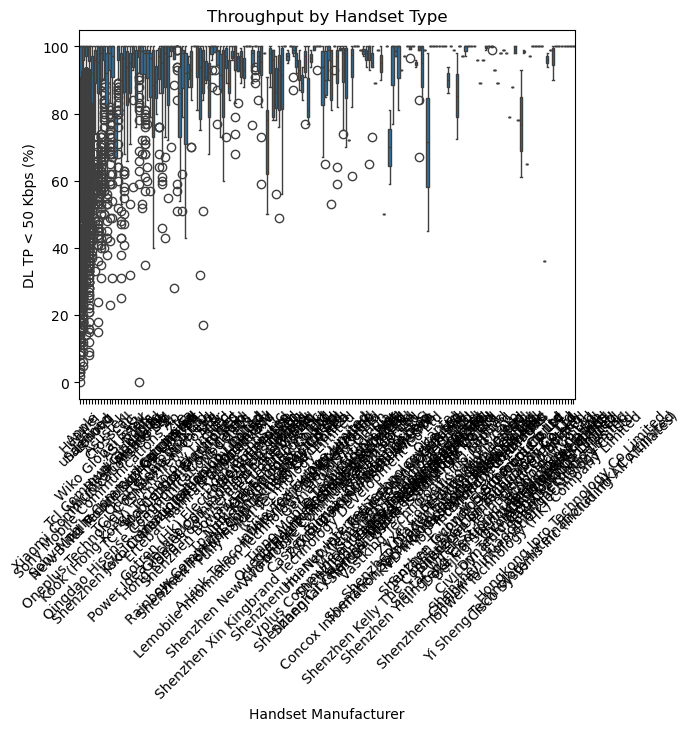

In [43]:
# d. Distribution of average throughput per handset type
sns.boxplot(x='Handset Manufacturer', y='DL TP < 50 Kbps (%)', data=customer_experience)
plt.xticks(rotation=45)
plt.title('Throughput by Handset Type')
plt.show()

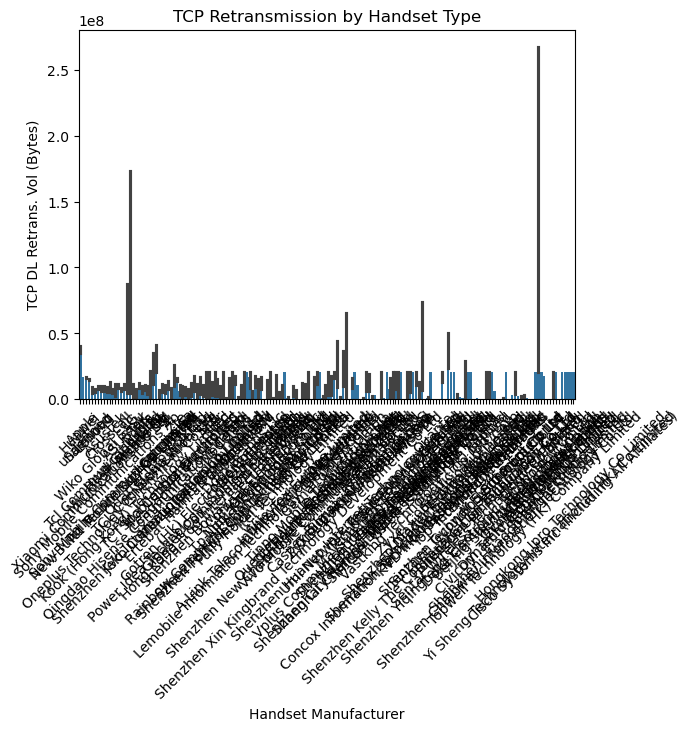

In [106]:
sns.barplot(x='Handset Manufacturer', y='TCP DL Retrans. Vol (Bytes)', data=customer_experience)
plt.xticks(rotation=45)
plt.title('TCP Retransmission by Handset Type')
plt.show()

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [45]:
experience_metrics = customer_experience[['TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'DL TP < 50 Kbps (%)']]
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(experience_metrics)

In [46]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_experience['Experience Cluster'] = kmeans.fit_predict(scaled_metrics)

In [47]:
# Describe clusters
for cluster in range(3):
    cluster_data = customer_experience[customer_experience['Experience Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Avg TCP Retrans: {cluster_data['TCP DL Retrans. Vol (Bytes)'].mean()}")
    print(f"Avg RTT: {cluster_data['Avg RTT DL (ms)'].mean()}")
    print(f"Avg Throughput: {cluster_data['DL TP < 50 Kbps (%)'].mean()}")



Cluster 0:
Avg TCP Retrans: 24878083.58961614
Avg RTT: 128.45174273939838
Avg Throughput: 69.7400164446412

Cluster 1:
Avg TCP Retrans: 15476545.498719735
Avg RTT: 116.21297647663306
Avg Throughput: 97.64732688830814

Cluster 2:
Avg TCP Retrans: 2231249413.4143577
Avg RTT: 104.90569620253163
Avg Throughput: 49.86518987341772


In [56]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [57]:
scaler_engagement = StandardScaler()
scaled_engagement = scaler_engagement.fit_transform(engagement_metrics)
kmeans_engagement = KMeans(n_clusters=3, random_state=42)
engagement_clusters = kmeans_engagement.fit_predict(scaled_engagement)
centroids_engagement = kmeans_engagement.cluster_centers_

In [58]:
less_engaged_centroid = centroids_engagement[0]
user_engagement_data = scaler_engagement.transform(engagement_metrics)
engagement_scores = np.linalg.norm(user_engagement_data - less_engaged_centroid, axis=1)

In [59]:
scaler_experience = StandardScaler()
scaled_experience = scaler_experience.fit_transform(experience_metrics)
kmeans_experience = KMeans(n_clusters=3, random_state=42)
experience_clusters = kmeans_experience.fit_predict(scaled_experience)
centroids_experience = kmeans_experience.cluster_centers_

In [60]:
worst_experience_centroid = centroids_experience[1]
user_experience_data = scaler_experience.transform(experience_metrics)
experience_scores = np.linalg.norm(user_experience_data - worst_experience_centroid, axis=1)

In [62]:
print(len(users))  # Number of unique users
print(len(engagement_scores))  # Should match len(users)
print(len(experience_scores))  # Should match len(users)

106857
106856
106856


In [65]:
user_data = df.groupby('MSISDN/Number').agg({
    'Avg RTT DL (ms)': 'mean',
    'DL TP < 50 Kbps (%)': 'mean'
}).reset_index()


In [66]:
engagement_scores = np.random.rand(len(user_data))  # placeholder
experience_scores = np.random.rand(len(user_data))  # placeholder

In [67]:
satisfaction_df = pd.DataFrame({
    'MSISDN/Number': user_data['MSISDN/Number'],
    'Engagement Score': engagement_scores,
    'Experience Score': experience_scores
})
